In [1]:
# common imports
import pandas as pd
import numpy as np

# data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_excel('./Concrete_Data.xls')

# to have a look into the data
data.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780


In [4]:
# As our data has lengthy column names, we will change our column names

# column mapper to be passed in the .rename() method to change column names
column_mapper = {col : col.split('(')[0].lower() for col in data.columns }

# units is for units of each column
units = { col.split('(')[0] : [col.split('(')[-1][:-1]] for col in data.columns.str.lower() }

# Creating a df for units
units_df = pd.DataFrame(units)
display(units_df)

train_df  = data.rename(column_mapper, axis=1, inplace=False)

,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength
0,kg in a m^3 mixture,kg in a m^3 mixture,kg in a m^3 mixture,kg in a m^3 mixture,kg in a m^3 mixture,kg in a m^3 mixture,kg in a m^3 mixture,day,"mpa, megapascals)"


In [5]:
train_df.info()
train_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast furnace slag             1030 non-null   float64
 2   fly ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse aggregate               1030 non-null   float64
 6   fine aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


## 1 and 2  
***Now we need to split our data into val and train parts and train our linear Regression***

***here : val data == test data***

In [15]:
train, val, y_train, y_val = train_test_split( train_df.drop(['concrete compressive strength'],axis=1),
                                               train_df['concrete compressive strength'], 
                                               test_size = 0.3,
                                               shuffle = True, # We can change here as 'Fasle' to not shuffle the data 
                                               random_state= 193,
                                               )
# Now training our Model
model = LinearRegression()
model.fit(train,y_train)

# getting out prediction for train and val set
prediction_val = model.predict(val)
prediction_train = model.predict(train)

# printing the R2 scores
print(f" R2 score of model in train set is : {r2_score(y_train,prediction_train)*100:.3f} ")
print(f" R2 score of model in validation set is : {r2_score(y_val,prediction_val)*100:.3f} \n")

# Printing the MSE values
print(f" MSE in train data is : {np.mean((y_train-prediction_train)**2):.3f} ")
print(f" MSE in validation data is : {np.mean((y_val-prediction_val)**2):.3f} ")


 R2 score of model in train set is : 62.092 
 R2 score of model in validation set is : 59.502 

 MSE in train data is : 107.153 
 MSE in validation data is : 108.592 


## 3

In [19]:
# creating the submission.csv here
prediction_df = pd.DataFrame({'predicted':prediction_val, 'true_val':y_val} )
display(prediction_df.head(2))

''' Remove the comments below to save the output as csv file '''
# prediction_df.to_csv('submission.csv',index=True)

,predicted,true_val
558,34.057499,19.765208
645,33.484284,19.539060


' Remove the comments below to save the output as csv file '

In [20]:
prediction_df.sample(5)

,predicted,true_val
617,12.213842,9.307926
389,41.669494,44.133359
578,35.621516,17.200358
951,23.740926,19.009543
6,69.940406,43.698299


## 4

In [21]:
# A:

# printing the R2 scores
print(f" R2 score of model in train set is : {r2_score(y_train,prediction_train)*100:.3f} ")
print(f" R2 score of model in validation set is : {r2_score(y_val,prediction_val)*100:.3f} \n")

# Printing the MSE values
print(f" MSE in train data is : {np.mean((y_train-prediction_train)**2):.3f} ")
print(f" MSE in validation data is : {np.mean((y_val-prediction_val)**2):.3f} ")

 R2 score of model in train set is : 62.092 
 R2 score of model in validation set is : 59.502 

 MSE in train data is : 107.153 
 MSE in validation data is : 108.592 


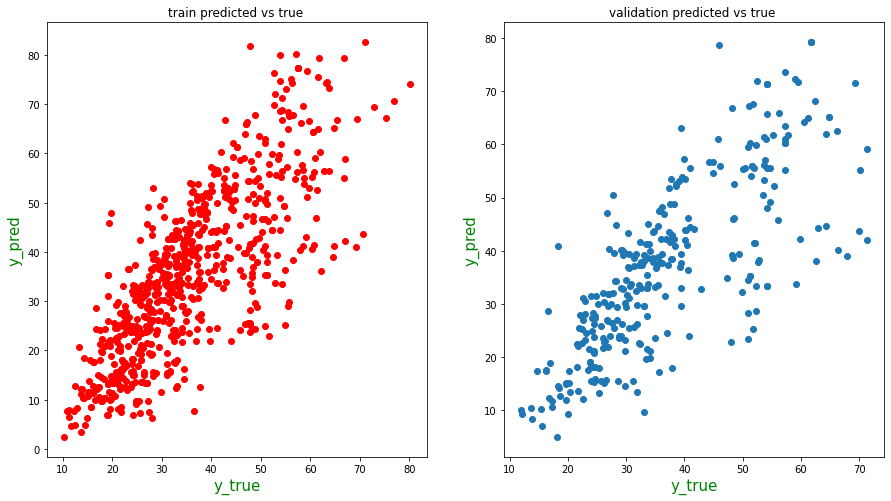

In [22]:
# B:
# Plotting the Values

fig = plt.figure( figsize=(15,8) )

# making the subplot - 1
plt.subplot(1,2,1)
plt.scatter(prediction_train, y_train.tolist(), color='red', )

plt.xlabel('y_true',size = 15, color='green')
plt.ylabel('y_pred',size = 15, color='green')
plt.title('train predicted vs true ')

# making the subplot - 2
plt.subplot(1,2,2)
plt.scatter(prediction_val, y_val.tolist())

plt.xlabel('y_true',size = 15, color='green')
plt.ylabel('y_pred',size = 15, color='green')
plt.title('validation predicted vs true ')

#plt.legend(loc='best')
plt.show()